In [294]:
# Load modules
import pandas as pd
import re
import numpy as np
%matplotlib inline
import matplotlib as mpl
from nltk.corpus import stopwords # Filter out stopwords
import seaborn as sns
from nltk.tokenize import word_tokenize

In [347]:
# load data set
indeed = pd.read_csv('indeed.csv')
indeed.head()
# check for Null
print(np.sum(indeed.isnull()))
# one company is null,get rid of Null result
indeed.dropna(subset=['company'],inplace=True)
print(np.sum(indeed.isnull()))

company         1
location        1
reviews      2772
salary      10836
summary         1
title           1
dtype: int64
company         0
location        0
reviews      2771
salary      10835
summary         0
title           0
dtype: int64


In [430]:
# clean up columns
indeed['review']=indeed.reviews.str.replace(',','').str.extract('(\d*)',expand=False)
indeed['city']= indeed.location.str.extract("(\D*)", expand=False)
indeed['state']= indeed.location.str.extract("([A-Z]{2})", expand=False)
indeed.head()

,company,location,reviews,salary,summary,title,review,city,state,jd,...,NLP,Recommendation Systems,Web Scraping,Predictive Modeling,Optimization,Descision Tree,Clustering,PHD,Master,Bachelor
0,Samsung Research America,"Boston, MA","5,680 reviews",NaN,"<span id=""job_summary"" class=""summary""><div><p...",Research Associate,5680,"Boston, MA",MA,Position Summary: SRA’s Advanced Material...,...,False,False,False,False,False,False,False,True,False,False
1,Hult International Business School,"Cambridge, MA",58 reviews,NaN,"<span id=""job_summary"" class=""summary"">The Opp...",Business Intelligence Analyst,58,"Cambridge, MA",MA,"The Opportunity We are seeking a motivated, ...",...,False,False,False,True,False,False,False,False,True,False
2,Root Robotics,"Cambridge, MA 02140",NaN,"Full-time, Internship","<span id=""job_summary"" class=""summary""><div><p...",Learning Design Intern,NaN,"Cambridge, MA",MA,Company Overview Root Robotics is creat...,...,False,False,False,False,False,False,False,False,False,False
3,Cambridge Public Schools,"Cambridge, MA 02141",15 reviews,"$111,456 - $127,246 a year","<span id=""job_summary"" class=""summary""><b>Over...",Science Curriculum Coordinator (JK-12),15,"Cambridge, MA",MA,"Overview: Cambridge is a vibrant, diverse ...",...,False,False,False,False,False,False,False,False,True,False
4,Shields Health Solutions,"Quincy, MA 02169",NaN,NaN,"<span id=""job_summary"" class=""summary""><div><p...",Data Scientist,NaN,"Quincy, MA",MA,Who we are: As the first and largest sp...,...,True,False,False,False,False,False,False,True,False,False


In [351]:
# clean summary text as job description column
indeed['jd'] = indeed.summary.str.replace('<.*?>',' ').str.replace('\n',' ') # get rid of html format
# random pick one summary to check clean text result
print(indeed.jd[4967])

 Are you an enthusiastic, high performer with the ability to work collaboratively in a fast-paced environment? If so, State Fund’s Predictive Analytics and Modeling unit may be the perfect place to for you! This job will enhance multiple skills, provide career development and the opportunity to preview our Company for permanent employment after graduation. Our Student Assistant Program assists students in navigating through the merit-based civil service hiring and examination process. We encourage high performing student assistants to apply for permanent State Fund job openings. At State Fund, we care about our employees and our student assistants, come join our team    Conditions of Employment    This is a part-time, temporary, non-benefited, student position. Employment in all positions with University Enterprises, Inc. is dependent upon the mutual consent of University Enterprises, Inc. and the employee. This means that either University Enterprises, Inc. or the employee can, at any

In [352]:
# create columns for toolkits
indeed['R']=indeed.jd.str.contains('(?<=[\W])R(?=[\W])',case=True) # case sensitive
indeed['Python']=indeed.jd.str.contains('python',case=False) 
indeed['SAS']=indeed.jd.str.contains('SAS',case=True)
indeed['Matlab']=indeed.jd.str.contains('matlab',case=False)
indeed['SQL']=indeed.jd.str.contains('sql',case=False)
indeed['Tableau']=indeed.jd.str.contains('tableau',case=False)
indeed['TensorFlow']=indeed.jd.str.contains('tensor( ?)flow',case=False)
indeed['Excel']=indeed.jd.str.contains('(?<=[\W])Excel(?=[\W])',case=False)
indeed['Java']=indeed.jd.str.contains('java',case=False)
indeed['Hadoop']=indeed.jd.str.contains('hadoop',case=False)
indeed['Linux']=indeed.jd.str.contains('linux',case=False)
indeed['Stata']=indeed.jd.str.contains('stata',case=False)
indeed['Scala']=indeed.jd.str.contains('scala',case=False)
indeed['C']=indeed.jd.str.contains('(?<=[\W])C(?=[\W])',case=True)
indeed['Spark']=indeed.jd.str.contains('spark',case=False)
indeed['HTML']=indeed.jd.str.contains('html',case=False)
indeed['AWS']=indeed.jd.str.contains('AWS|[Aa]mazon [Ww]eb [Ss]ervice',case=False,regex=True)
indeed['Ruby']=indeed.jd.str.contains('ruby',case=False)
indeed['SPSS']=indeed.jd.str.contains('spss',case=True)
indeed['Bash']=indeed.jd.str.contains('bash',case=False)
indeed['H2O']=indeed.jd.str.contains('h2o',case=False)
indeed['BI']=indeed.jd.str.contains('BI',case=True)
indeed['Hive']=indeed.jd.str.contains('hive',case=False)
indeed['Pig']=indeed.jd.str.contains('pig',case=False)
indeed['Perl']=indeed.jd.str.contains('perl',case=False)
indeed['Oracle']=indeed.jd.str.contains('oracle',case=False)
indeed['NoSQL']=indeed.jd.str.contains('nosql',case=False)
indeed['MongoDB']=indeed.jd.str.contains('mongodb',case=False)
indeed['Scikit Learn']=indeed.jd.str.contains('scikit',case=False)

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


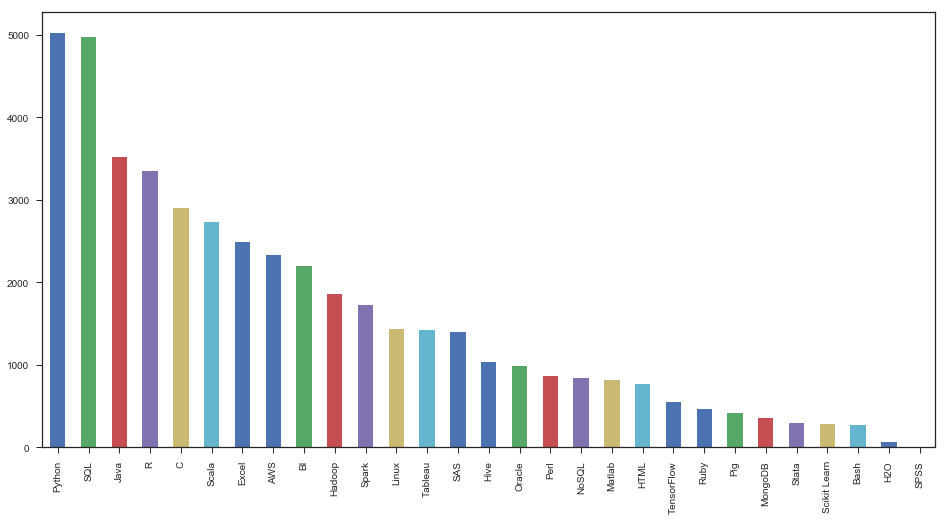

In [624]:
toolkit_list=['R', 'Python','SAS', 'Matlab', 'SQL', 'Tableau', 'TensorFlow',\
              'Excel', 'Java','Hadoop', 'Linux', 'Stata', 'Scala', 'Spark', 'HTML',\
              'AWS','Ruby', 'SPSS', 'Bash', 'H2O', 'BI', 'Hive', 'Pig', 'Perl','Oracle','NoSQL',\
             'MongoDB','Scikit Learn','C']
# plot total number of toolkits that appeared in job description in decending order
mpl.pyplot.figure(figsize=(16, 8))
indeed.loc[:,toolkit_list].apply(pd.value_counts).loc[True].sort_values(ascending=False).plot.bar()

In [419]:
# create columns for skill requirements
indeed['Machine Learning']=indeed.jd.str.contains('ML|[Mm]achine [lL]earning')
indeed['Data Visualization']=indeed.jd.str.contains('visualization',case=False)
indeed['Deep Learning']=indeed.jd.str.contains('[Dd]eep [Ll]earning')
indeed['AI']=indeed.jd.str.contains('AI|[Aa]rtificial [Ii]nteligence')
indeed['Neural Network']=indeed.jd.str.contains('[Nn]eural ?[Nn]')
indeed['A/B Testing']=indeed.jd.str.contains('[Aa]/[Bb] test')
indeed['NLP']=indeed.jd.str.contains('[Nn]atural [Ll]anguage [Pp]rocessing|NLP')
indeed['Recommendation Systems']=indeed.jd.str.contains('[Rr]ecommendation [Ss]ystem')
indeed['Web Scraping']=indeed.jd.str.contains('([Ww]eb )?[Ss]crap')
indeed['Predictive Modeling']=indeed.jd.str.contains('[Pp]redictive [Mm]odel')
indeed['Optimization']=indeed.jd.str.contains('[Oo]ptimization')
indeed['Descision Tree']=indeed.jd.str.contains('[Tt]ree')
indeed['Clustering']=indeed.jd.str.contains('[[Cc]luster')

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  # Remove the CWD from sys.path while we load stuff.


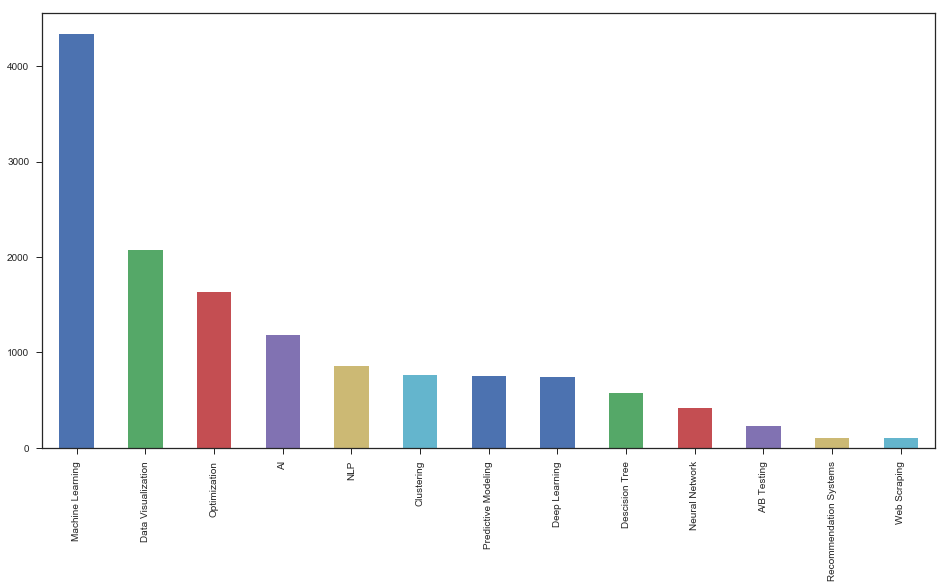

In [558]:
skill_list = ['Machine Learning', 'Data Visualization', 'Deep Learning','AI','Neural Network', 'A/B Testing', \
              'NLP','Recommendation Systems', 'Web Scraping', 'Predictive Modeling','Optimization', \
              'Descision Tree', 'Clustering']
# bar chart for number of key skill requirement appearance
mpl.pyplot.figure(figsize=(16, 8))
indeed.loc[:,skill_list].apply(pd.value_counts).loc[True].sort_values(ascending=False).plot.bar()

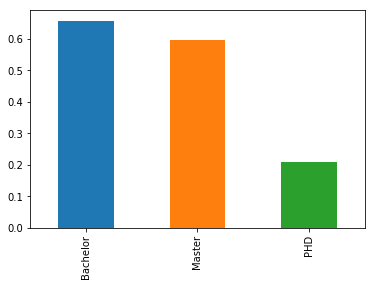

In [356]:
# create columns for degree requirements
indeed['PHD']=indeed.jd.str.contains('(?<=[\W])phd(?=[\W])|ph.d|[Dd]octorate|[Pp]ost graduate', case=False)
indeed['Master']=indeed.jd.str.contains('[Mm]aster|MS|[Gg]raduate|M.S',case=True)
indeed['Bachelor']=indeed.jd.str.contains('[Bb]achelor|BS|BA|B.A',case=True)
# plot percentage of degree requirment appear in total job description
indeed.loc[:,['PHD','Master','Bachelor']].apply(lambda x: pd.value_counts(x,normalize=True)).loc[True].sort_values(ascending=False).plot.bar()

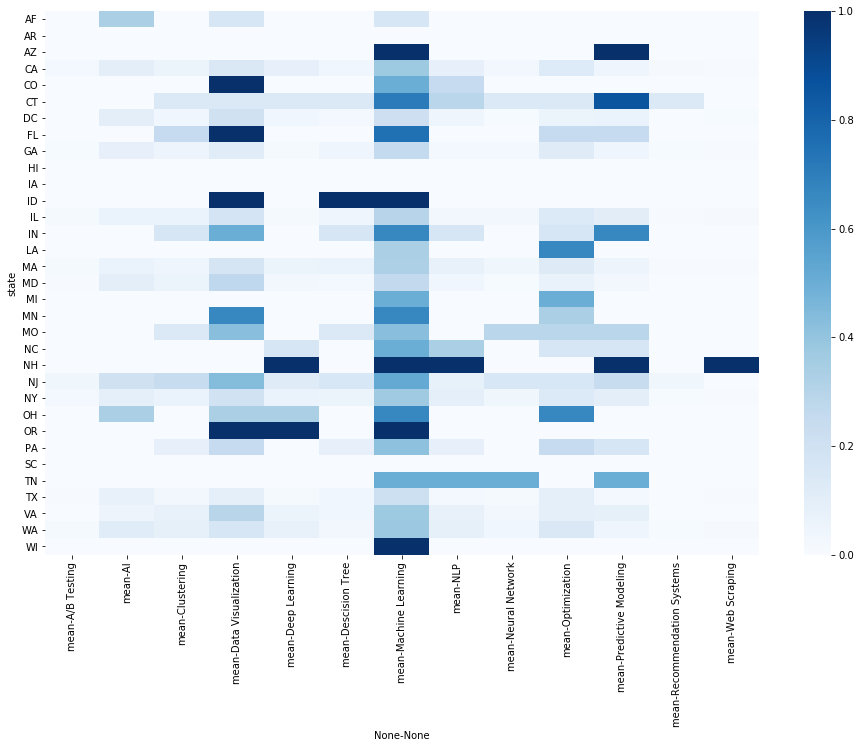

In [447]:
# plot heatmap for the percentage of key skills appear in each state
a = pd.pivot_table(indeed,index=['state'],values=skill_list,aggfunc=[np.mean])
mpl.pyplot.figure(figsize=(16, 10))
sns.heatmap(a,cmap="Blues")

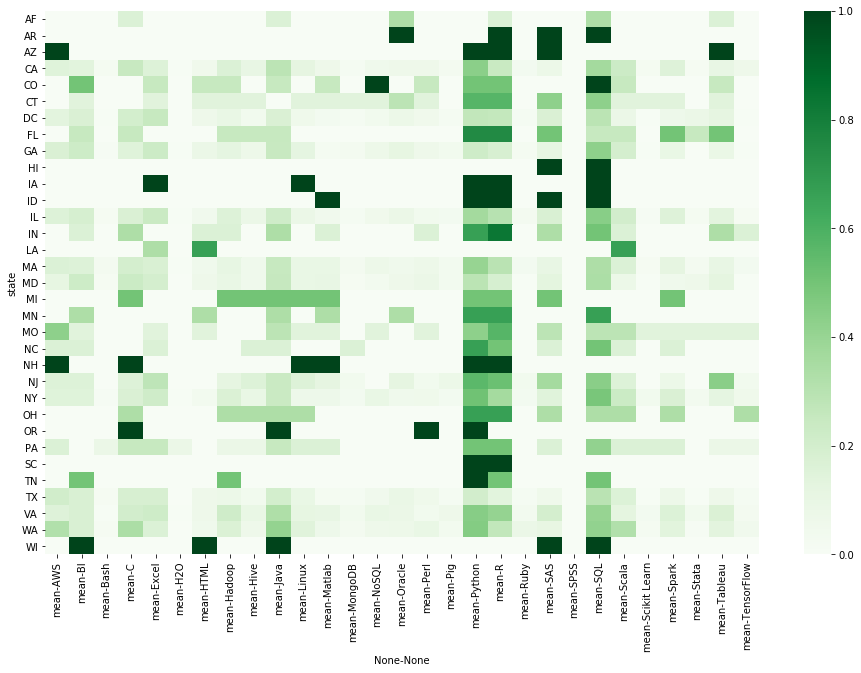

In [444]:
# plot heat map for percentage of toolkits appear in each state
a = pd.pivot_table(indeed,index=['state'],values=toolkit_list,aggfunc=[np.mean])
mpl.pyplot.figure(figsize=(16, 10))
sns.heatmap(a,cmap="Greens")

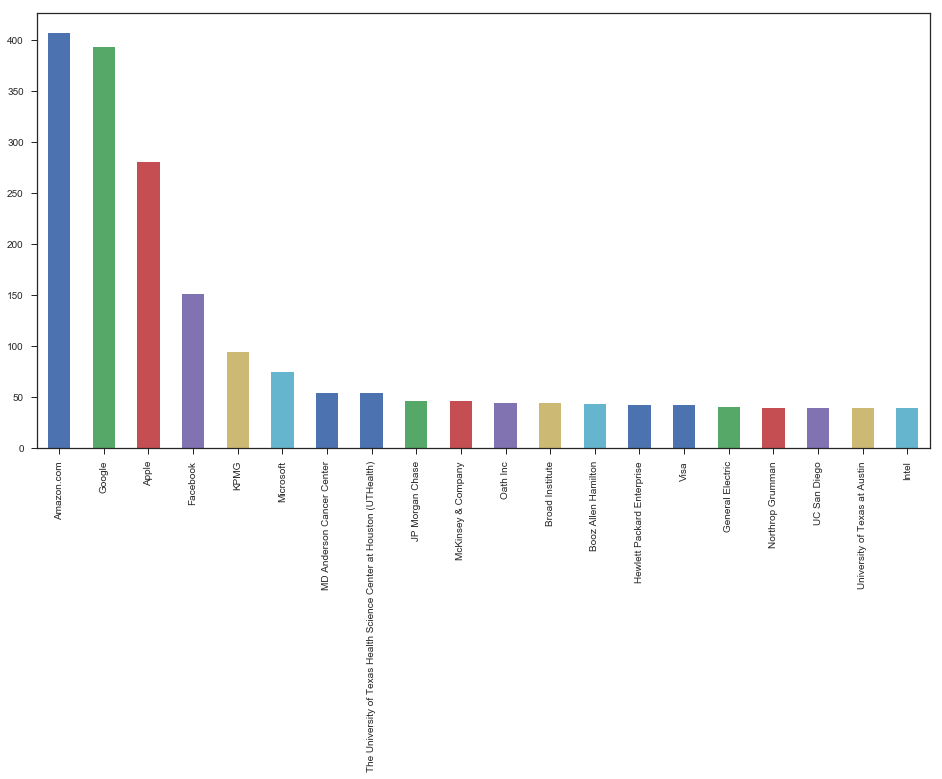

In [557]:
# Top 20 hire companies for data scientists
mpl.pyplot.figure(figsize=(16, 8))
indeed['company'].value_counts()[:20].plot.bar()

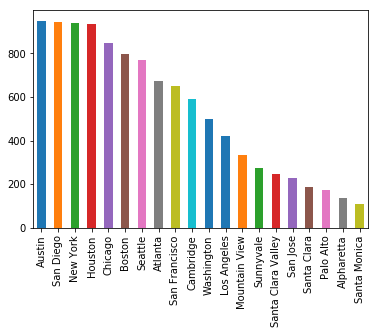

In [210]:
# top 20 hiring cities for data scientist
indeed['city'].value_counts()[:20].plot.bar()

In [505]:
# extract salary information for salary analysis
indeed['salary_low']=indeed.salary.str.replace('[,$]','').str.extract('(\d{5,})[ -]*',expand=False).astype('float')
indeed['salary_high']=indeed.salary.str.replace('[,$]','').str.extract('[ -](\d{5,})',expand=False)
#indeed_salary_year = 
indeed[indeed.salary_low.notnull()].shape
# create salary df with only salary variable
indeed_salary = indeed.loc[indeed.salary_low.notnull(),['company','title','city','state','salary','salary_low','salary_high']]

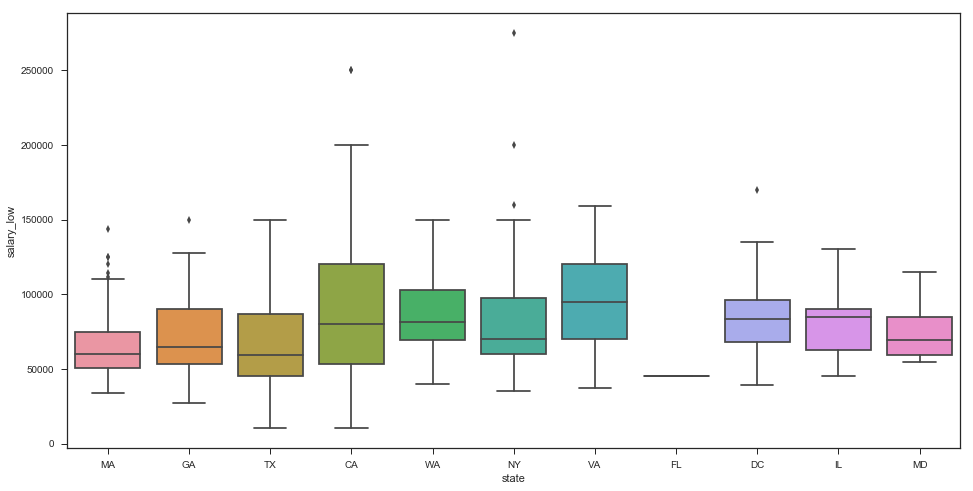

In [516]:
# plot salary variance box plot for different state
sns.set(style="ticks")
mpl.pyplot.figure(figsize=(16, 8))
sns.boxplot(x="state", y="salary_low", data=indeed_salary)

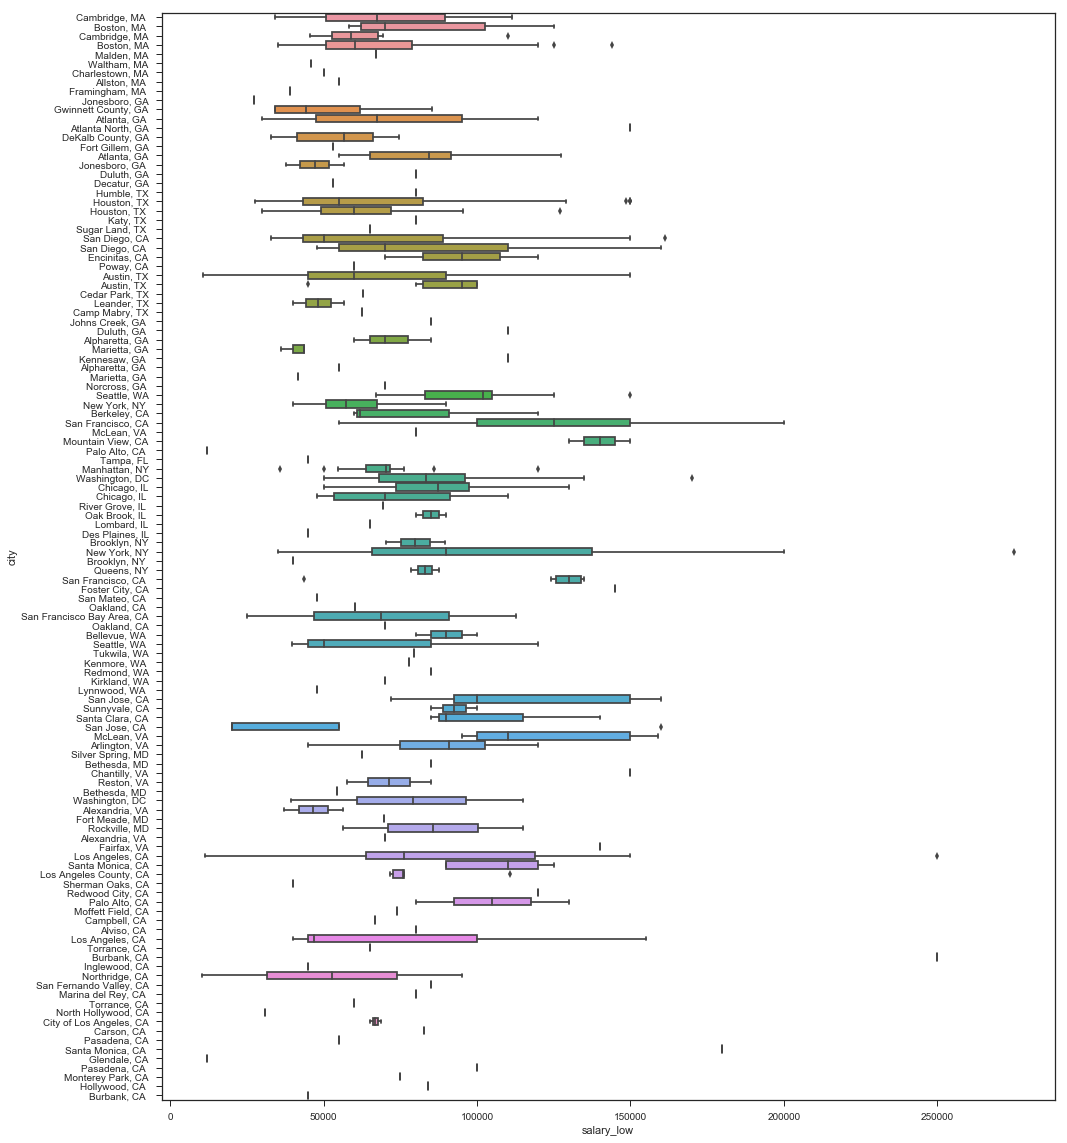

In [525]:
# salary box plot for different cities
sns.set(style="ticks")
mpl.pyplot.figure(figsize=(16, 20))
sns.boxplot(x="salary_low", y="city", data=indeed_salary)

In [267]:
# collecting all job description for top 5 tech hiring companies
google = indeed.groupby('company')['jd'].agg(np.sum).loc[['Google']]
amazon = indeed.groupby('company')['jd'].agg(np.sum).loc[['Amazon.com']]
apple = indeed.groupby('company')['jd'].agg(np.sum).loc[['Apple']]
facebook = indeed.groupby('company')['jd'].agg(np.sum).loc[['Facebook']]
microsoft = indeed.groupby('company')['jd'].agg(np.sum).loc[['Microsoft']]

In [283]:
# generate txt file for top 5 hiring tech companies for comparison cloud in Rstudio
googlejd = []
amazonjd = []
applejd = []
facebookjd = []
microsoftjd = []
for i in google:
    googlejd.append(i)
for i in amazon:
    amazonjd.append(i)
for i in apple:
    applejd.append(i)
for i in facebook:
    facebookjd.append(i)
for i in microsoft:
    microsoftjd.append(i)

# join jd lists to one string
googletext=" ".join(googlejd)
amazontext=" ".join(amazonjd)
appletext=" ".join(applejd)
facebooktext=" ".join(facebookjd)
microsofttext = " ".join(microsoftjd)

# write all jd for each company
# file = open("./text/google.txt", "w")
# file.write(googletext)
# file = open("./text/amazon.txt","w")
# file.write(amazontext)
# file = open("./text/apple.txt","w")
# file.write(appletext)
# file = open("./text/facebook.txt","w")
# file.write(facebooktext)
# file = open("./microsoft.txt","w")
# file.write(microsofttext)

331393

In [617]:
# Building Gensim word2vec model
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# create a list of all job descriptions
corpus = indeed['jd'].values.tolist()
# tokenize the corpus
tok_corp = [word_tokenize(x) for x in corpus]

In [622]:
# remove stopwords
stopWords = set(stopwords.words('english'))

final_corp=[]

for jd in tok_corp:
    l=[]
    for word in jd:
        if word.lower() not in stopWords:
            l.append(word.lower())
        final_corp.append(l)
#final_corp[1:5]

[['position',
  'summary',
  ':',
  'sra',
  '’',
  'advanced',
  'materials',
  'lab',
  '(',
  'aml',
  ')',
  'burlington',
  ',',
  'seeking',
  'expert',
  'new',
  'battery',
  'material',
  'synthesis',
  'analysis',
  '.',
  'ideal',
  'candidate',
  'expertise',
  'solid',
  'state',
  'material',
  'synthesis',
  'electrochemical',
  'testing',
  'particular',
  'emphasis',
  'development',
  'solid',
  'electrolytes',
  'and/or',
  'next',
  'generation',
  'anode',
  'materials',
  'silicon',
  'alloy',
  'composites',
  '.',
  'successful',
  'candidate',
  'independently',
  'pursue',
  'research',
  'advancing',
  'amls',
  'development',
  'next-generation',
  'battery',
  'technologies',
  '.',
  'advanced',
  'materials',
  'lab',
  'burlington',
  ',',
  'part',
  'samsung',
  'research',
  'america',
  'headquartered',
  'mountain',
  'view',
  ',',
  'ca',
  '.',
  'aml',
  'engaged',
  'materials',
  'design',
  'discovery',
  'broad',
  'range',
  'next',
  'gene

In [625]:
# train the model
# model = Word2Vec(final_corp)

In [ ]:
# save model
model.save('jd_model.bin')

In [587]:
# load model
#model = Word2Vec.load('jd_model.bin')

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


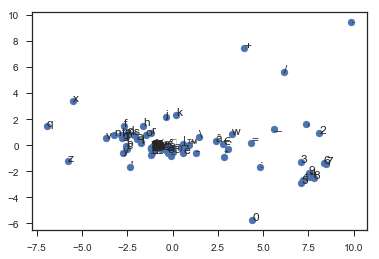

In [613]:
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
mpl.pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    mpl.pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
mpl.pyplot.show()

In [580]:
model.most_similar('Chase')

/Users/mymacpro/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('JPMorgan', 0.933617889881134),
 ('Morgan', 0.7737743854522705),
 ('Stanley', 0.7614063024520874),
 ('Black', 0.7346207499504089),
 ('J.P.', 0.7067112326622009),
 ('River', 0.7046388387680054),
 ('Turner', 0.7041910290718079),
 ('Co.', 0.6983228325843811),
 ('Entertainment', 0.6981859803199768),
 ('Liberty', 0.6907964944839478)]